In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from pathlib import Path

In [57]:
CURRENT_DIR = Path.cwd()

In [58]:
filepath = os.path.join(CURRENT_DIR, "S03_residual_stress_merge.xlsx")
dfm = pd.read_excel(filepath).rename(
    columns={"Sigma(x)": "sigma_x_pre", "FWHM": "FWHM_pre"}
)
dfm


,idx_excel_post,section,sample_no,location,R,W,D,sigma_x_post,FWHM_post,idx_excel_pre,sigma_x_pre,FWHM_pre,diff_sigma_x
0,4,AA5052,1,1,1400,60,10,13,2.55,2,-15,2.50,28
1,25,AA5052,2,1,1400,60,15,16,2.51,9,2,2.47,14
2,46,AA5052,3,1,1400,60,20,19,2.47,16,9,2.48,10
3,67,AA5052,4,1,1400,70,10,20,2.45,23,10,2.48,10
4,88,AA5052,5,1,1400,70,15,6,2.47,30,0,2.49,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1050,Center,50,7,1600,70,15,2,2.45,0,0,0.00,2
1131,1071,Center,51,7,1600,70,20,2,2.45,0,0,0.00,2
1132,1092,Center,52,7,1600,80,10,5,2.54,0,0,0.00,5
1133,1113,Center,53,7,1600,80,15,1,2.41,0,0,0.00,1


In [59]:
default_cols = ["section", "sample_no", "location"]

,section,sample_no,location,sigma_x_pre,idx_excel_pre
6,AA5052,7,1,-45,44
817,AA5052,7,6,-44,49
36,AA5052,37,1,-41,254
51,AA5052,52,1,-41,359


Imputing idx 370 at location 3, section AA5052 with mean value: -9.69811320754717


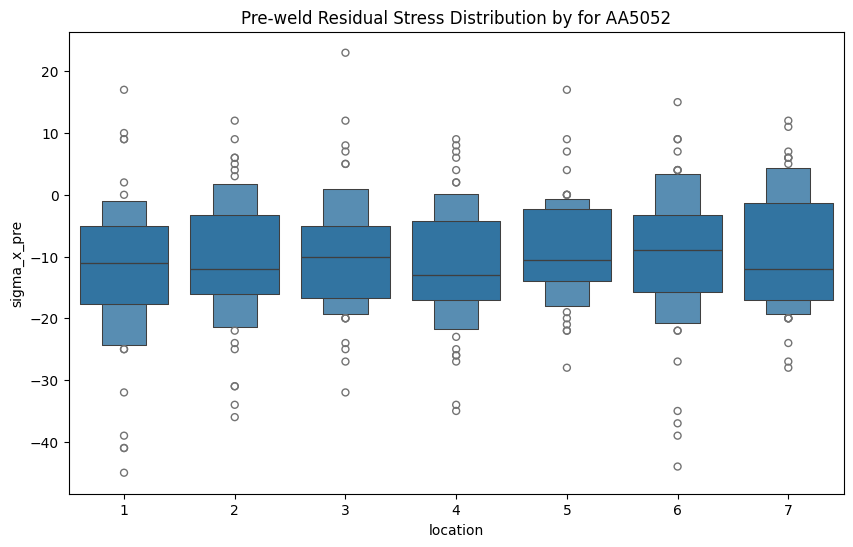

In [66]:
# Plot boxenplot of pre-weld residual stress by location and section
filt = dfm["section"].isin(["AA5052"])
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(dfm[filt], x="location", y="sigma_x_pre", ax=ax)
ax.set_title("Pre-weld Residual Stress Distribution by for AA5052")


y = "sigma_x_pre"
idx_excel_col = "idx_excel_pre"
# Identify rows with high residual stress in pre-weld data for further investigation
filt_val = (dfm[y] > 150) | (dfm[y] < -40)
display(
    dfm[filt & filt_val][[*default_cols, y, idx_excel_col]].sort_values(by=y)
)

# Impute outlier values with median of respective location and section
impute_idxs = [370] 
for idx in impute_idxs:
    location = dfm.loc[idx, "location"]
    section = dfm.loc[idx, "section"]
    filt_idx = (dfm["location"] == location) & (dfm["section"] == section) & (~dfm.index.isin(impute_idxs))
    mean_val = dfm[filt_idx][y].mean()
    print(f"Imputing idx {idx} at location {location}, section {section} with mean value: {mean_val}")
    dfm.loc[idx, y] = dfm[filt_idx][y].median()

In [61]:
# Impute outlier values with median of respective location and section
impute_idxs = [370] 
for idx in impute_idxs:
    location = dfm.loc[idx, "location"]
    section = dfm.loc[idx, "section"]
    filt_idx = (dfm["location"] == location) & (dfm["section"] == section)
    mean_val = dfm[filt_idx][y].mean()
    print(f"Imputing idx {idx} at location {location}, section {section} with mean value: {mean_val}")
    dfm.loc[idx, y] = dfm[filt_idx][y].median()

Imputing idx 370 at location 3, section AA5052 with mean value: -9.703703703703704


,section,idx_excel_pre,sigma_x_pre
745,AA6061,300,-109
554,AA6061,96,-92
227,AA6061,73,-85
747,AA6061,314,-83
217,AA6061,3,-79
392,AA6061,95,-78
875,AA6061,77,-77
566,AA6061,180,-76
723,AA6061,146,-73
270,AA6061,374,-72


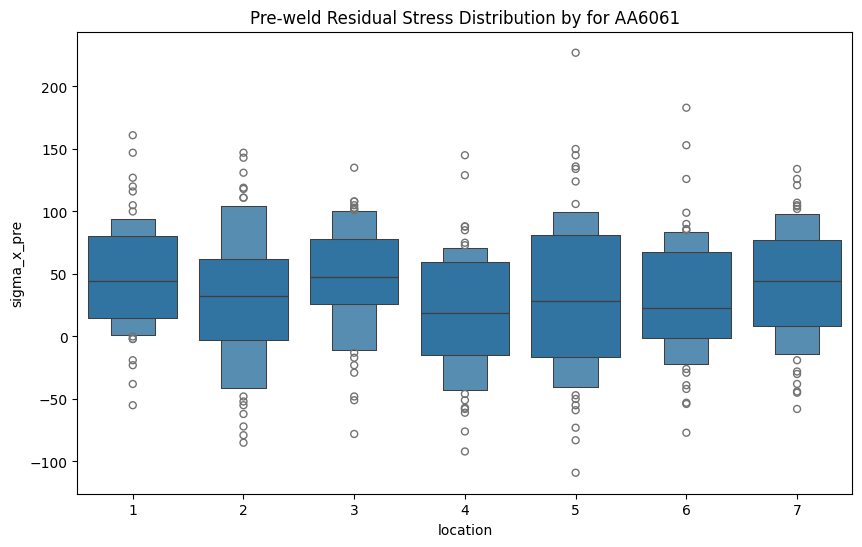

In [62]:
# Plot boxenplot of pre-weld residual stress by location and section
filt = dfm["section"].isin(["AA6061"])
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(dfm[filt], x="location", y="sigma_x_pre", ax=ax)
ax.set_title("Pre-weld Residual Stress Distribution by for AA6061")

y = "sigma_x_pre"
# Identify rows with high residual stress in pre-weld data for further investigation
filt_val = (dfm[y] > 150) | (dfm[y] < -40)
display(dfm[filt & filt_val][["section", "idx_excel_pre", y]].sort_values(by=y))

,section,idx_excel_post,sigma_x_post


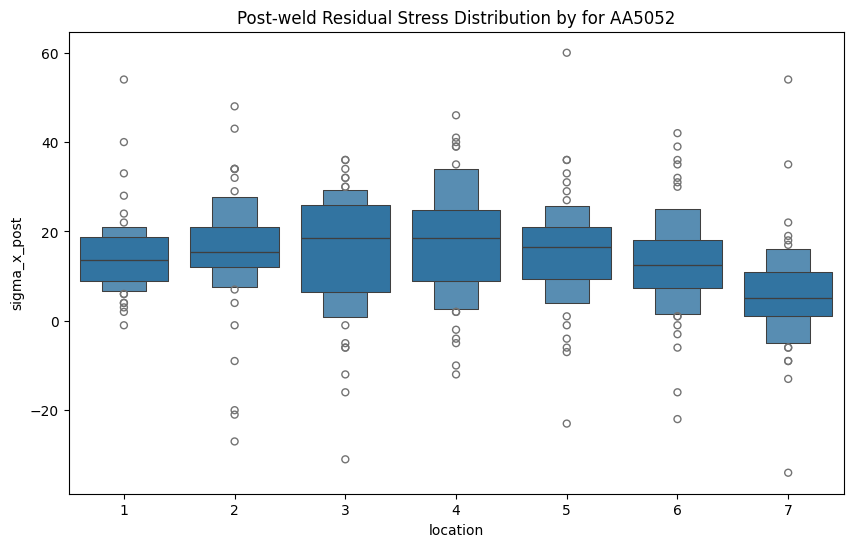

In [63]:
# Plot boxenplot of post-weld residual stress by location and section
filt = dfm["section"].isin(["AA5052"])
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(dfm[filt], x="location", y="sigma_x_post", ax=ax)
ax.set_title("Post-weld Residual Stress Distribution by for AA5052")

y = "sigma_x_post"
# Identify rows with high residual stress in post-weld data for further investigation
filt_val = (dfm[y] > 150) | (dfm[y] < -40)
display(dfm[filt & filt_val][["section", "idx_excel_post", y]].sort_values(by=y))

,section,idx_excel_post,sigma_x_post
1039,AA6061,272,-122
1027,AA6061,20,-90
417,AA6061,806,-56
1066,AA6061,839,-54
889,AA6061,521,-52
407,AA6061,596,-44
878,AA6061,290,-44
563,AA6061,473,-41


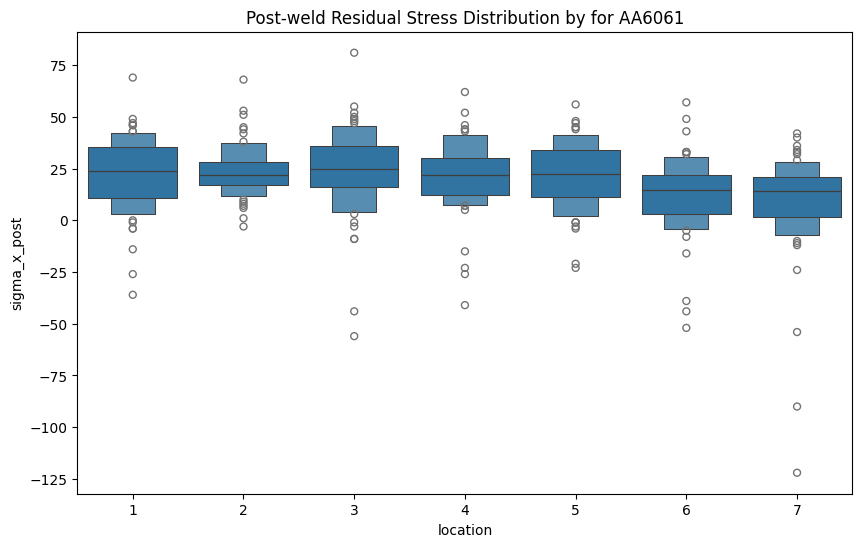

In [64]:
# Plot boxenplot of post-weld residual stress by location and section
filt = dfm["section"].isin(["AA6061"])
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(dfm[filt], x="location", y="sigma_x_post", ax=ax)
ax.set_title("Post-weld Residual Stress Distribution by for AA6061")

y = "sigma_x_post"
# Identify rows with high residual stress in post-weld data for further investigation
filt_val = (dfm[y] > 150) | (dfm[y] < -40)
display(dfm[filt & filt_val][["section", "idx_excel_post", y]].sort_values(by=y))

,section,idx_excel_post,sigma_x_post
1039,AA6061,272,-122
1027,AA6061,20,-90
417,AA6061,806,-56
1066,AA6061,839,-54
889,AA6061,521,-52
407,AA6061,596,-44
878,AA6061,290,-44
563,AA6061,473,-41


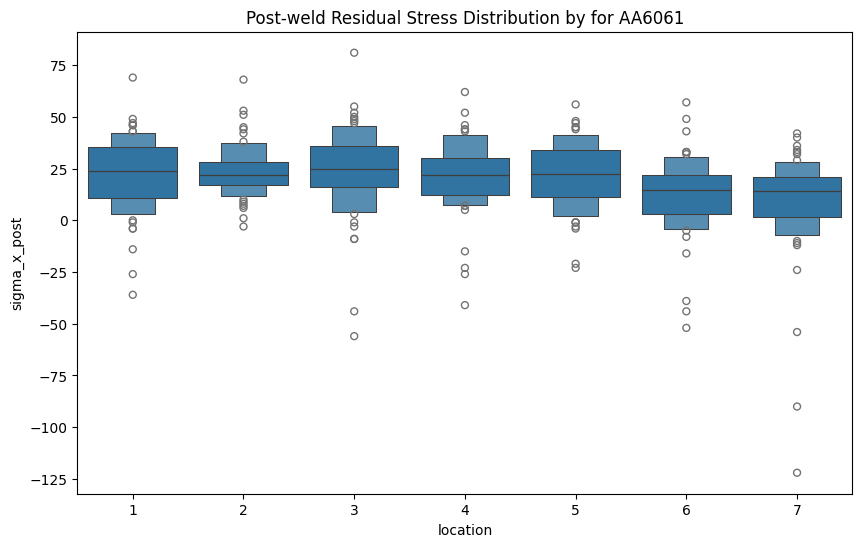

In [65]:
# Plot boxenplot of post-weld residual stress by location and section
filt = dfm["section"].isin(["AA6061"])
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(dfm[filt], x="location", y="sigma_x_post", ax=ax)
ax.set_title("Post-weld Residual Stress Distribution by for AA6061")

y = "sigma_x_post"
# Identify rows with high residual stress in post-weld data for further investigation
filt_val = (dfm[y] > 150) | (dfm[y] < -40)
display(dfm[filt & filt_val][["section", "idx_excel_post", y]].sort_values(by=y))